In [1100]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, boxcox
from scipy import stats

In [1101]:
data = pd.read_csv("insurance.csv")

In [1102]:
print("Data Columns")
data.columns

Data Columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [1103]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [1104]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [1105]:
print("Data Info")
data.info()

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**sex - charges**

In [1106]:
data[["sex","charges"]].groupby(["sex"], as_index = False).mean().sort_values(by = "charges",ascending = False).style.background_gradient("Greens")


,sex,charges
1,male,13956.751178
0,female,12569.578844


We see that men pay more than women.

Although there is not much difference, we can evaluate this in the model part.

**children - charges**

In [1107]:
data[["children","charges"]].groupby(["children"], as_index = False).mean().sort_values(by = "charges",ascending = False).style.background_gradient("Greens")

,children,charges
3,3,15355.318367
2,2,15073.563734
4,4,13850.656311
1,1,12731.171832
0,0,12365.975602
5,5,8786.035247


We see the effect of the number of children on the wages paid.

We see that those with 5 children pay less.

**smoker - charges**

In [1108]:
 data[["smoker","charges"]].groupby(["smoker"], as_index = False).mean().sort_values(by = "charges",ascending = False).style.background_gradient("Greens")

,smoker,charges
1,yes,32050.231832
0,no,8434.268298


We see that smokers pay more than non-smokers.

the difference is great, it can have a lot of influence on the model. We can use this by examining it better in the model part.

**region - charges**

In [1109]:
data[["region","charges"]].groupby(["region"], as_index = False).mean().sort_values(by = "charges",ascending = False).style.background_gradient("Greens")

,region,charges
2,southeast,14735.411438
0,northeast,13406.384516
1,northwest,12417.575374
3,southwest,12346.937377


we see the fees paid by regions.

**bmi**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


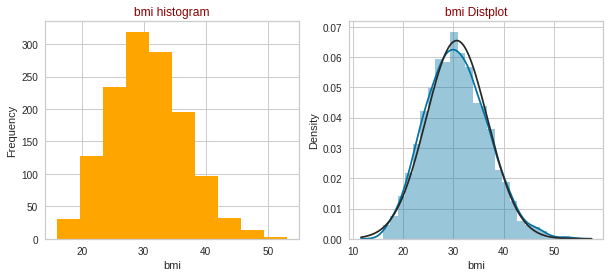

In [1110]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(data["bmi"], color="orange")
plt.xlabel("bmi")
plt.ylabel("Frequency")
plt.title("bmi histogram", color = "darkred")
plt.subplot(1,2,2)
sns.distplot(data["bmi"], fit=norm)
plt.title("bmi Distplot", color = "darkred")

plt.show()

In the first graph we look at the distribution of bmi.

We can see from the first graph that it actually has a nice distribution. We supported this with the second chart. Almost the same as the normal distribution. So there is no need to do anything here.

**Age**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


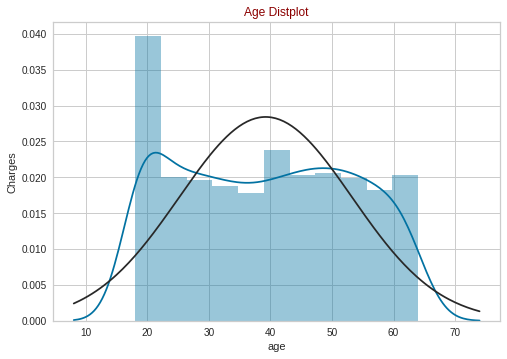

In [1111]:
plt.xlabel("age range")
plt.ylabel("Charges")
sns.distplot(data["age"], fit=norm)
plt.title("Age Distplot", color = "darkred")

plt.show()

we see the distribution of age characteristics according to the normal distribution. In fact, there does not seem to be a big difference with the normal distribution, but it can still be corrected.

**encodeing categorical data**

In [1112]:
data["sex"] = [0 if i == "female" else 1 for i in data["sex"]]
data["sex"] = data["sex"].astype("category")
data = pd.get_dummies(data, columns= ["sex"])
data.head()

,age,bmi,children,smoker,region,charges,sex_0,sex_1
0,19,27.900,0,yes,southwest,16884.92400,1,0
1,18,33.770,1,no,southeast,1725.55230,0,1
2,28,33.000,3,no,southeast,4449.46200,0,1
3,33,22.705,0,no,northwest,21984.47061,0,1
4,32,28.880,0,no,northwest,3866.85520,0,1


In [1113]:
data["children"] = data["children"].astype("category")
data = pd.get_dummies(data, columns= ["children"])
data.head()

,age,bmi,smoker,region,charges,sex_0,sex_1,children_0,children_1,children_2,children_3,children_4,children_5
0,19,27.900,yes,southwest,16884.92400,1,0,1,0,0,0,0,0
1,18,33.770,no,southeast,1725.55230,0,1,0,1,0,0,0,0
2,28,33.000,no,southeast,4449.46200,0,1,0,0,0,1,0,0
3,33,22.705,no,northwest,21984.47061,0,1,1,0,0,0,0,0
4,32,28.880,no,northwest,3866.85520,0,1,1,0,0,0,0,0


In [1114]:
data["smoker"] = data["smoker"].astype("category")
data = pd.get_dummies(data, columns= ["smoker"])
data.head()

,age,bmi,region,charges,sex_0,sex_1,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes
0,19,27.900,southwest,16884.92400,1,0,1,0,0,0,0,0,0,1
1,18,33.770,southeast,1725.55230,0,1,0,1,0,0,0,0,1,0
2,28,33.000,southeast,4449.46200,0,1,0,0,0,1,0,0,1,0
3,33,22.705,northwest,21984.47061,0,1,1,0,0,0,0,0,1,0
4,32,28.880,northwest,3866.85520,0,1,1,0,0,0,0,0,1,0


In [1115]:
data["region"] = data["region"].astype("category")
data = pd.get_dummies(data, columns= ["region"])
data.head()

,age,bmi,charges,sex_0,sex_1,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,1,0,1,0,0,0,0,0,0,1,0,0,0,1
1,18,33.770,1725.55230,0,1,0,1,0,0,0,0,1,0,0,0,1,0
2,28,33.000,4449.46200,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,33,22.705,21984.47061,0,1,1,0,0,0,0,0,1,0,0,1,0,0
4,32,28.880,3866.85520,0,1,1,0,0,0,0,0,1,0,0,1,0,0


**charges preprocessing**

In [1116]:
(mu, sigma) = norm.fit(data["charges"])
print("mu {} : {}, sigma {} : {}".format("charges", mu, "charges", sigma))

mu charges : 13270.422265141257, sigma charges : 12105.484975561612


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


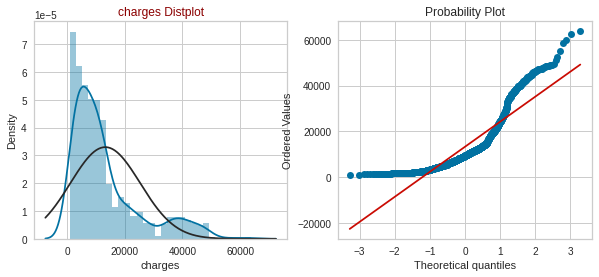

In [1117]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["charges"], fit=norm)
plt.title("charges Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["charges"], plot = plt)
plt.show()

we noticed that there was skewness. We took notes to fix this. We're going to fix this here.

In [1118]:
data["charges"] = np.log1p(data["charges"])

In [1119]:
(mu, sigma) = norm.fit(data["charges"])
print("mu {} : {}, sigma {} : {}".format("charges", mu, "charges", sigma))

mu charges : 9.098827980629359, sigma charges : 0.9190355163595243


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


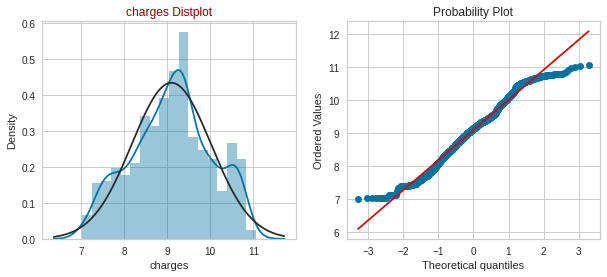

In [1120]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["charges"], fit=norm)
plt.title("charges Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["charges"], plot = plt)
plt.show()


As you can see by comparing with the 2 graphs above. We see the fix.

In [1121]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.regressor import PredictionError
from sklearn.neighbors import KNeighborsRegressor


In [1122]:
y = data.charges
X = data.drop(["charges"], axis = 1)

In [1123]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y,
    test_size=0.25, shuffle = True, random_state = 8)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, 
    test_size=0.25, random_state= 8) 

In [1124]:
print("X_train shape {}, len {}.".format(X_train.shape,len(X_train)))
print("X_test shape {}, len {}.".format(X_test.shape,len(X_test)))
print("Y_train shape {}, len {}.".format(Y_train.shape,len(Y_train)))
print("Y_test shape {}, len {}.".format(Y_test.shape,len(Y_test)))
print("X_val shape {}, len {}.".format(X_val.shape,len(X_val)))
print("Y_vla shape {}, len {}.".format(Y_val.shape,len(Y_val)))

X_train shape (752, 16), len 752.
X_test shape (335, 16), len 335.
Y_train shape (752,), len 752.
Y_test shape (335,), len 335.
X_val shape (251, 16), len 251.
Y_vla shape (251,), len 251.


In [1125]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

In [1126]:
result = []

**Linear Regression**

In [1127]:
multiple_linear = LinearRegression()
multiple_linear.fit(X_train, Y_train)
predict = multiple_linear.predict(X_test)
score = r2_score(Y_test,predict)
result.append(score)

In [1128]:
print("r_square score --> ",score)
print('Mean Absolute Error -->', metrics.mean_absolute_error(Y_test, predict))
print('Mean Squared Error -->', metrics.mean_squared_error(Y_test, predict))
print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(Y_test, predict)))

r_square score -->  0.7682634462758346
Mean Absolute Error --> 0.30910561346523885
Mean Squared Error --> 0.20873050678247143
Root Mean Squared Error --> 0.4568703391362493


In [1129]:
df_linearRegression = pd.DataFrame({'Actual': Y_test, 'Predicted': predict})
df_linearRegression.head()

,Actual,Predicted
943,7.396011,7.842719
495,7.584785,8.032905
257,8.594521,8.719184
802,7.651634,7.975410
93,8.653472,8.839301


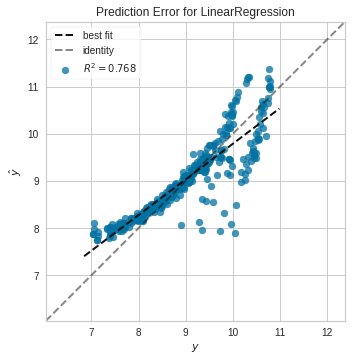

In [1130]:
visualizer = PredictionError(multiple_linear)
visualizer.fit(X_train, Y_train)  
visualizer.score(X_test, Y_test)        
visualizer.show();

**KNN Regression**

In [1131]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)
knn_predict = knn.predict(X_test)
score_knn = r2_score(Y_test,knn_predict)
result.append(score_knn)

In [1132]:
print("r_square score --> ",score_knn)
print('Mean Absolute Error -->', metrics.mean_absolute_error(Y_test, knn_predict))
print('Mean Squared Error -->', metrics.mean_squared_error(Y_test, knn_predict))
print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(Y_test, knn_predict)))

r_square score -->  0.7051318112870125
Mean Absolute Error --> 0.34186086292047885
Mean Squared Error --> 0.26559463958090745
Root Mean Squared Error --> 0.5153587484276438


In [1133]:
df_KNNRegressor = pd.DataFrame({'Actual': Y_test, 'Predicted': knn_predict})
df_KNNRegressor.head()

,Actual,Predicted
943,7.396011,7.515739
495,7.584785,7.592995
257,8.594521,8.550327
802,7.651634,7.844082
93,8.653472,8.864871


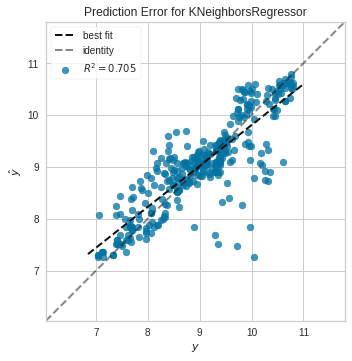

In [1134]:
visualizer = PredictionError(knn)
visualizer.fit(X_train, Y_train)  
visualizer.score(X_test, Y_test)        
visualizer.show();

**Random Forest Regression**

In [1135]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

rf_param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = rf_param_grid, n_iter = 20, cv = 100, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, Y_train)
rf_predict = rf_random.predict(X_test)
score_rf = r2_score(Y_test,rf_predict)
result.append(score_rf)

Fitting 100 folds for each of 20 candidates, totalling 2000 fits


In [ ]:
print("r_square score --> ",score_rf)
print('Mean Absolute Error -->', metrics.mean_absolute_error(Y_test, rf_predict))
print('Mean Squared Error -->', metrics.mean_squared_error(Y_test, rf_predict))
print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(Y_test, rf_predict)))

In [ ]:
df_RandomForestRegressor = pd.DataFrame({'Actual': Y_test, 'Predicted': rf_predict})
df_RandomForestRegressor.head()

In [ ]:
visualizer = PredictionError(rf_random)
visualizer.fit(X_train, Y_train)  
visualizer.score(X_test, Y_test)        
visualizer.show();

In [ ]:
df_result = pd.DataFrame({"Score":result, "ML Models":["LinearRegression","KNN Regression",
             "RandomForestRegression"]})

In [ ]:
df_result